In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from glob import glob
import cv2
import os

In [8]:
training_dir = '/content/Training'
test_dir = '/content/Testing'

In [9]:
print(len(next(os.walk(training_dir))[1]))

4


In [10]:
my_list = os.listdir(training_dir)
print(my_list)

['notumor', 'glioma', 'pituitary', 'meningioma']


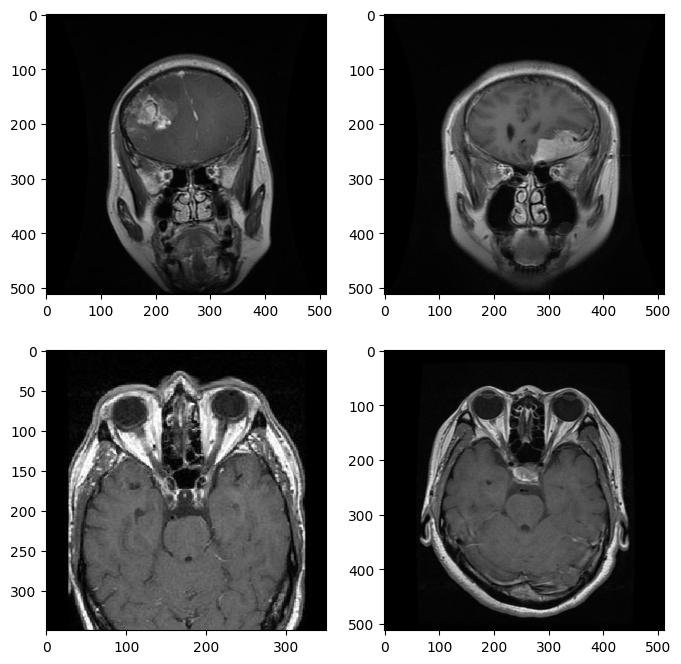

In [12]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(np.array(Image.open("/content/Training/glioma/Tr-glTr_0000.jpg")))#glioma

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(np.array(Image.open("/content/Training/meningioma/Tr-meTr_0000.jpg")))#meningioma

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(np.array(Image.open("/content/Training/notumor/Tr-noTr_0000.jpg")))#notumor

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(np.array(Image.open("/content/Training/pituitary/Tr-piTr_0000.jpg")))#pituitary


In [13]:
vgg = VGG16()

553467096/553467096 [==============================] - 10s 0us/step


In [14]:
vgg_layer_list = vgg.layers
print(len(vgg_layer_list))

23


In [15]:
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [17]:
numberOfClass = 4
for layers in model.layers:
    layers.trainable = False

model.add(Dense(numberOfClass,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [18]:
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

train_data = ImageDataGenerator().flow_from_directory(training_dir,target_size=(224,224))

test_data = ImageDataGenerator().flow_from_directory(test_dir,target_size=(224,224))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [19]:
batch_size=64
hist = model.fit_generator(train_data,steps_per_epoch=1600//batch_size,epochs=20,validation_data=test_data,validation_steps=800//batch_size)

<ipython-input-19-54d78aad5a54>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,steps_per_epoch=1600//batch_size,epochs=20,validation_data=test_data,validation_steps=800//batch_size)


Epoch 1/20
25/25 [==============================] - 744s 30s/step - loss: 1.0528 - accuracy: 0.6675 - val_loss: 0.8940 - val_accuracy: 0.7161
Epoch 2/20
25/25 [==============================] - 722s 29s/step - loss: 0.6259 - accuracy: 0.7793 - val_loss: 0.5560 - val_accuracy: 0.8177
Epoch 3/20
25/25 [==============================] - 725s 29s/step - loss: 0.6125 - accuracy: 0.7950 - val_loss: 1.2827 - val_accuracy: 0.7005
Epoch 4/20
25/25 [==============================] - 727s 29s/step - loss: 0.5068 - accuracy: 0.8300 - val_loss: 0.5726 - val_accuracy: 0.8307
Epoch 5/20
25/25 [==============================] - 726s 30s/step - loss: 0.3847 - accuracy: 0.8512 - val_loss: 0.6675 - val_accuracy: 0.7786
Epoch 6/20
25/25 [==============================] - 718s 29s/step - loss: 0.4418 - accuracy: 0.8584 - val_loss: 0.7851 - val_accuracy: 0.7760
Epoch 7/20
25/25 [==============================] - 727s 30s/step - loss: 0.3630 - accuracy: 0.8763 - val_loss: 0.5298 - val_accuracy: 0.8333
Epoch 

In [25]:
model.save_weights("brain-tumor-mri.h5")

In [20]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [21]:
print("Model accuracy is: ",hist.history["accuracy"][-1])

Model accuracy is:  0.9100000262260437


In [22]:
print("Model loss is: ",hist.history["loss"][-1])

Model loss is:  0.2738252878189087


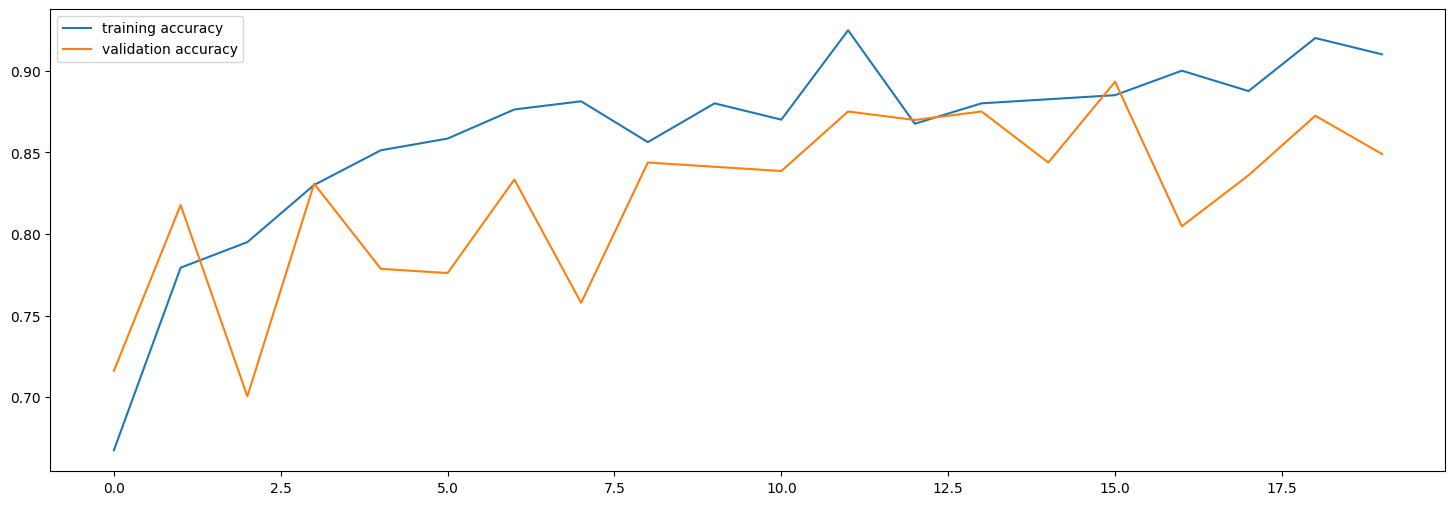

In [23]:
plt.figure(figsize=(18,6))
plt.plot(hist.history["accuracy"],label="training accuracy")
plt.plot(hist.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()

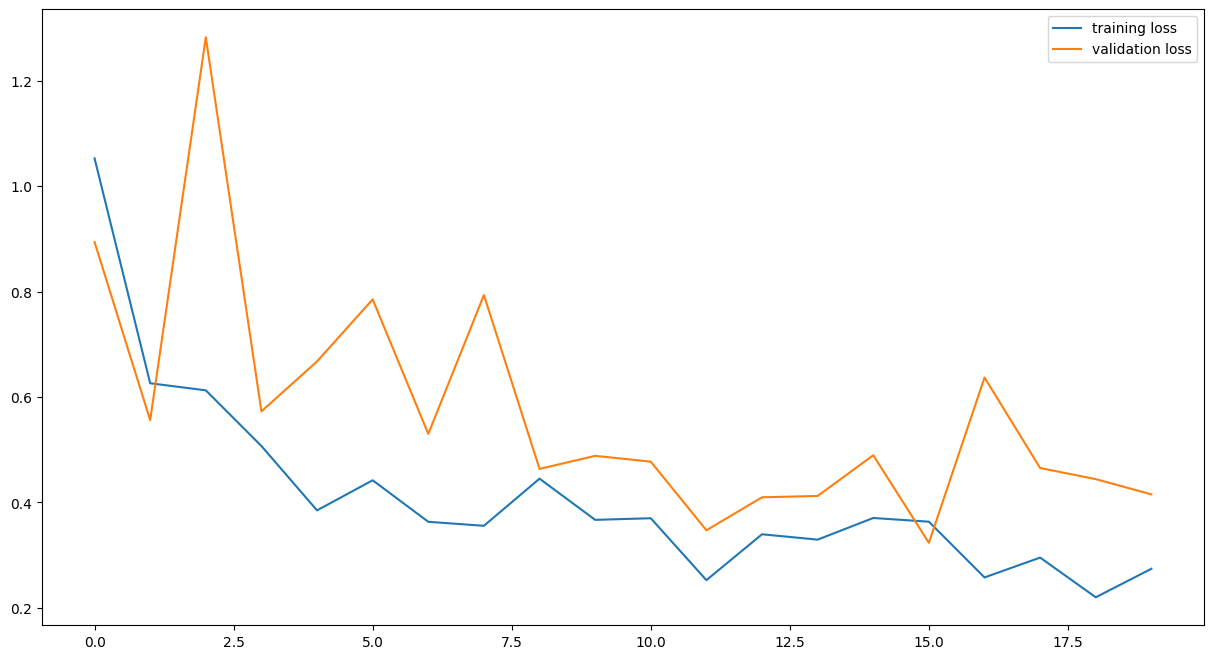

In [24]:
plt.figure(figsize=(15,8))
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],label="validation loss")
plt.legend()
plt.show()